# 🧩 2.5 Unsupervised Learning – Clustering (Heart Disease PCA Dataset)

We apply clustering using **K-Means** and **Hierarchical Clustering**,  
and compare discovered clusters with actual disease labels.


In [1]:
# --- 1. Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from google.colab import files

# Upload dataset
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving 04_heart_disease_pca.csv to 04_heart_disease_pca.csv


In [2]:
# --- 2. Features & Labels ---
X = df.drop(columns=["target"])
y = df["target"]


In [3]:
# --- 3. Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


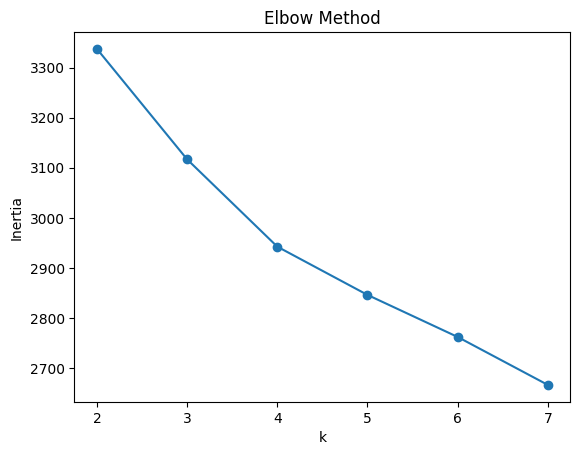

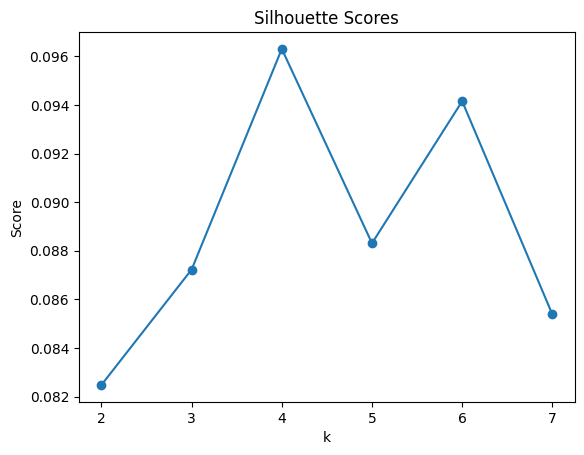

In [4]:
# --- 4. KMeans Clustering: Elbow & Silhouette ---
inertias, silhouettes, K = [], [], range(2, 8)
for k in K:
    km = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

plt.plot(K, inertias, marker='o')
plt.title("Elbow Method"); plt.xlabel("k"); plt.ylabel("Inertia"); plt.show()

plt.plot(K, silhouettes, marker='o')
plt.title("Silhouette Scores"); plt.xlabel("k"); plt.ylabel("Score"); plt.show()


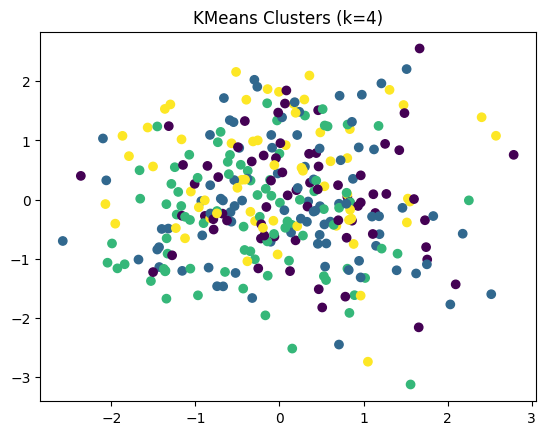

In [5]:
# --- 5. Best KMeans Visualization ---
best_k = K[np.argmax(silhouettes)]
km = KMeans(n_clusters=best_k, random_state=0, n_init=20)
labels = km.fit_predict(X_scaled)

pca = PCA(n_components=2)
X2 = pca.fit_transform(X_scaled)
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap="viridis")
plt.title(f"KMeans Clusters (k={best_k})"); plt.show()


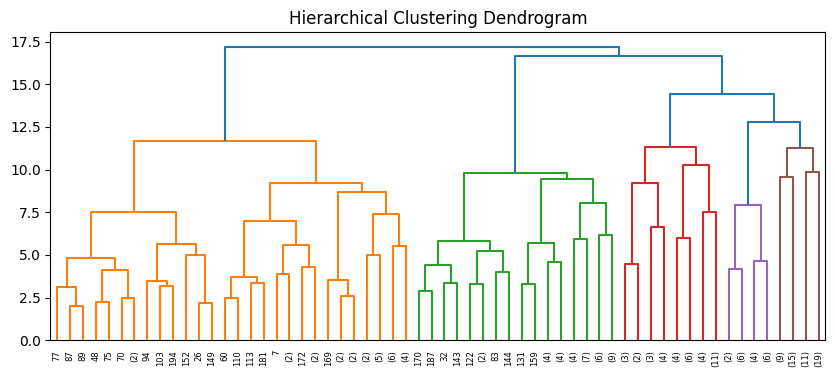

In [6]:
# --- 6. Hierarchical Clustering ---
Z = linkage(X_scaled[:200], method="ward")  # subset for clarity
plt.figure(figsize=(10,4))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram"); plt.show()


In [7]:
# --- 7. Evaluation ---
ari = adjusted_rand_score(y, labels)
nmi = normalized_mutual_info_score(y, labels)
cm = confusion_matrix(y, labels)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)
print("Confusion Matrix:\n", cm)


Adjusted Rand Index: 0.09981024027016322
Normalized Mutual Information: 0.10827749175799953
Confusion Matrix:
 [[11 48 68 37]
 [58 39 18 24]
 [ 0  0  0  0]
 [ 0  0  0  0]]


##Comparison with Supervised Model

The clustering analysis shows how patients can be grouped without label information.  
However, when compared with the true labels, clustering performance (ARI/NMI) was **significantly lower** than a supervised approach.  

In contrast, our best supervised model (**Support Vector Classifier**) achieved:  
- Accuracy ≈ **0.87**  
- AUC ≈ **0.94**

This highlights the advantage of supervised learning when labeled data is available,  
whereas unsupervised clustering is more useful for exploratory analysis.
